In [1]:
from VX_denoise import VX_denoise
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import audiofile as af

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


## Example - "Red Wheel"

Elapsed time is 0.028911 seconds.
Elapsed time is 0.027729 seconds.


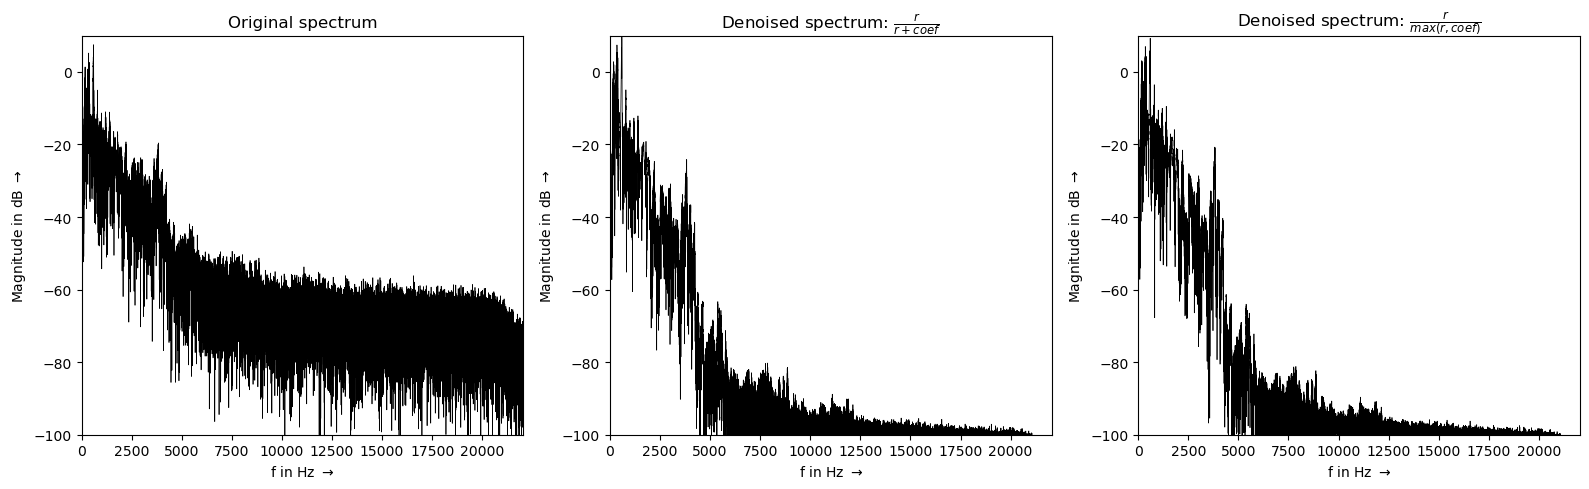

In [2]:
inputFile = 'audios\\redwheel.wav'

x, fs = af.read(inputFile)
auxName = inputFile.split('.wav')[0]

y1 = VX_denoise(x,method='sum',normOrigPeak=False)
af.write(auxName+'_denoise_sum.wav',y1,fs)
y2 = VX_denoise(x,method='max',normOrigPeak=False)
af.write(auxName+'_denoise_max.wav',y2,fs)

X = np.fft.fft(x,norm='ortho')
fx = np.arange(0,fs,fs/len(X))
Y1 = np.fft.fft(y1,norm='ortho')
fy1 = np.arange(0,fs,fs/len(Y1))
Y2 = np.fft.fft(y2,norm='ortho')
fy2 = np.arange(0,fs,fs/len(Y2))

plt.figure(figsize=(16,5))
plt.subplot(131)
plt.plot(fx,20*np.log10(abs(X)),'k-', lw=0.5)
plt.xlabel(r'f in Hz $\rightarrow$')
plt.ylabel(r'Magnitude in dB $\rightarrow$')
plt.title('Original spectrum')
plt.axis(xmin=0, xmax=fs/2, ymax=10, ymin=-100)
plt.subplot(132)
plt.plot(fy1,20*np.log10(abs(Y1)),'k-', lw=0.5)
plt.xlabel(r'f in Hz $\rightarrow$')
plt.ylabel(r'Magnitude in dB $\rightarrow$')
plt.title(r'Denoised spectrum: $\frac{r}{r+coef}$')
plt.axis(xmin=0, xmax=fs/2, ymax=10, ymin=-100)
plt.subplot(133)
plt.plot(fy2,20*np.log10(abs(Y2)),'k-', lw=0.5)
plt.xlabel(r'f in Hz $\rightarrow$')
plt.ylabel(r'Magnitude in dB $\rightarrow$')
plt.title(r'Denoised spectrum: $\frac{r}{max(r,coef)}$')
plt.axis(xmin=0, xmax=fs/2, ymax=10, ymin=-100)

plt.tight_layout()
plt.show()


## Example - "Flute"

Elapsed time is 0.035394 seconds.
Elapsed time is 0.037364 seconds.


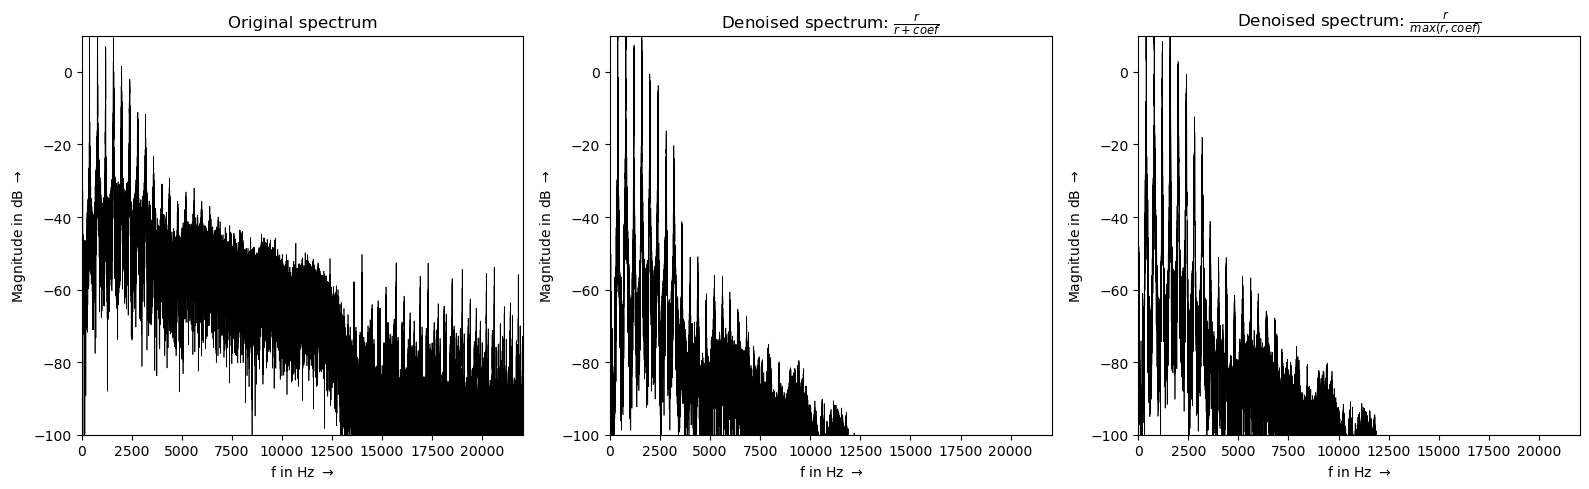

In [3]:
inputFile = 'audios\\flute2.wav'

x, fs = af.read(inputFile)
auxName = inputFile.split('.wav')[0]

y1 = VX_denoise(x,method='sum',normOrigPeak=False)
af.write(auxName+'_denoise_sum.wav',y1,fs)
y2 = VX_denoise(x,method='max',normOrigPeak=False)
af.write(auxName+'_denoise_max.wav',y2,fs)

X = np.fft.fft(x,norm='ortho')
fx = np.arange(0,fs,fs/len(X))
Y1 = np.fft.fft(y1,norm='ortho')
fy1 = np.arange(0,fs,fs/len(Y1))
Y2 = np.fft.fft(y2,norm='ortho')
fy2 = np.arange(0,fs,fs/len(Y2))

plt.figure(figsize=(16,5))
plt.subplot(131)
plt.plot(fx,20*np.log10(abs(X)),'k-', lw=0.5)
plt.xlabel(r'f in Hz $\rightarrow$')
plt.ylabel(r'Magnitude in dB $\rightarrow$')
plt.title('Original spectrum')
plt.axis(xmin=0, xmax=fs/2, ymax=10, ymin=-100)
plt.subplot(132)
plt.plot(fy1,20*np.log10(abs(Y1)),'k-', lw=0.5)
plt.xlabel(r'f in Hz $\rightarrow$')
plt.ylabel(r'Magnitude in dB $\rightarrow$')
plt.title(r'Denoised spectrum: $\frac{r}{r+coef}$')
plt.axis(xmin=0, xmax=fs/2, ymax=10, ymin=-100)
plt.subplot(133)
plt.plot(fy2,20*np.log10(abs(Y2)),'k-', lw=0.5)
plt.xlabel(r'f in Hz $\rightarrow$')
plt.ylabel(r'Magnitude in dB $\rightarrow$')
plt.title(r'Denoised spectrum: $\frac{r}{max(r,coef)}$')
plt.axis(xmin=0, xmax=fs/2, ymax=10, ymin=-100)

plt.tight_layout()
plt.show()


## Example - "MB20"

In [4]:
inputFile = 'audios\\mb20_disease.wav'

x, fs = af.read(inputFile)
auxName = inputFile.split('.wav')[0]
coefs = [0.1, 0.05,0.01,0.001]

for coef in coefs:
    y = VX_denoise(x,method='sum',coef=coef,normOrigPeak=True)
    af.write(auxName+'_denoise_sum_'+str(coef)+'.wav',y,fs)
    y = VX_denoise(x,method='max',coef=coef,normOrigPeak=True)
    af.write(auxName+'_denoise_max_'+str(coef)+'.wav',y,fs)

Elapsed time is 0.390190 seconds.
Elapsed time is 0.415345 seconds.
Elapsed time is 0.401902 seconds.
Elapsed time is 0.411113 seconds.
Elapsed time is 0.399875 seconds.
Elapsed time is 0.374172 seconds.
Elapsed time is 0.369689 seconds.
Elapsed time is 0.394294 seconds.
